<a href="https://colab.research.google.com/github/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/blob/main/Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas Predictivas y Descriptivas para la Generación de Nuevo Conocimiento

Este cuaderno contiene el código para la implementación de casos de modelos de machine learning para el curso de ciencia de datos.

In [6]:
# Cargar modulos para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## 1. Regresión Lineal

In [2]:
# Cargar modulos para modelo de regresión
import statsmodels.api as sm

### Caso Regresión: Efecto de Gasto Publicitario.

Supongamos que somos consultores estadísticos contratados por un cliente para investigar la asociación entre el gasto en publicidad y las ventas de un producto en particular. Nuestro cliente no puede incrementar directamente las ventas del producto pero puede controlar el gasto publicitario. 

Por lo tanto, si determinamos que existe una asociación entre publicidad y ventas, entonces podemos instruir a nuestro cliente para que ajuste los presupuestos publicitarios. En otras palabras, *nuestro objetivo es desarrollar un modelo preciso que se pueda utilizar para predecir las ventas sobre la base de los tres presupuestos de medios (TV, radio y periódico)*.



In [5]:
# Cargar datos
publicidad = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/main/publicidad.csv')
publicidad.head()

,tv,radio,periodico,zona,ventas
0,230.1,37.8,69.2,occidente,22.1
1,44.5,39.3,45.1,oriente,10.4
2,17.2,45.9,69.3,occidente,9.3
3,151.5,41.3,58.5,occidente,18.5
4,180.8,10.8,58.4,oriente,12.9


### Análisis Exploratorio de Datos

En primer lugar se hace un resumen estadístico de cada una de las variables:

In [7]:
# Resumen estadístico para variables numericas
publicidad.describe()

,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


El resumen estadístico se puede acompañar de gráficos para revisar la distribución y correlación entre variables.

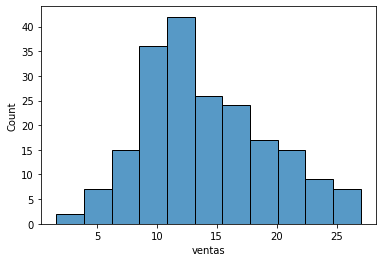

In [9]:
# Histograma para las ventas
sns.histplot(data=publicidad, x='ventas')

In [ ]:
# Histograma para el gasto en tv. Escriba el código a continuación


In [ ]:
# Histograma para el gasto en radio. Escriba el código a continuación


In [ ]:
# Histograma para el gasto en periodico. Escriba el código a continuación


Para variables categoricas se generan tablas de frecuencia.

In [12]:
# Tabla de frecuencia para zona
publicidad['zona'].value_counts()

sur          52
oriente      50
norte        50
occidente    48
Name: zona, dtype: int64

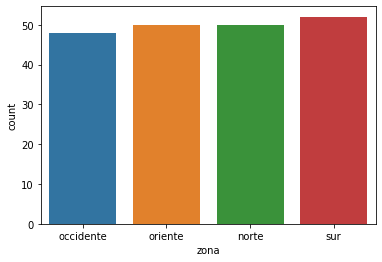

In [13]:
# Gráfico de Barra
sns.countplot(data=publicidad, x='zona')

Dado que se quiere analizar la relación entre el gasto en publicidad y las ventas. Es recomendable hacer un análisis de la relación entre el gasto en publicidad para cada rubro y las ventas. Para esto podemos utilizar los gráficos de *dispersión*.

En el eje $X$ ubique la variable dependiente (gasto) y en el eje $Y$ la variable dependiente.

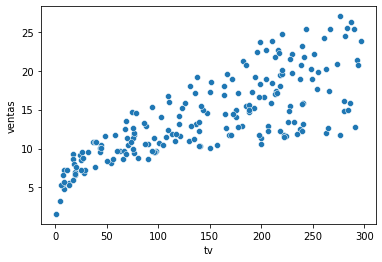

In [14]:
# Gráfico de dispersión gasto tv vs ventas
sns.scatterplot(data=publicidad, x='tv', y='ventas')

In [ ]:
# Gráfico de dispersión gasto radio vs ventas


In [ ]:
# Gráfico de dispersión gasto periodico vs ventas


Cuando se tiene una variable categorica y una variable numerica se pueden utilizar los gráficos de caja para estudiar la relación entre las dos variables.



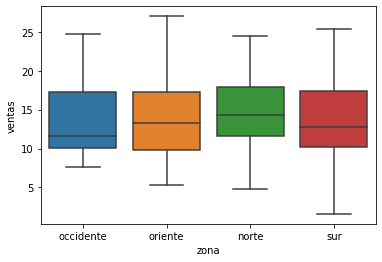

In [15]:
# Gráfico de caja zona vs ventas
sns.boxplot(data=publicidad, x='zona', y='ventas')

A contiuación, escriba las 5 principales conclusiones del análisis exploratorio:

- 
-
-
-
-

### Modelo de Regresión

En primer lugar se dividen los datos en variables independientes y variable dependiente.

In [16]:
# Variable dependiente
Y = publicidad['ventas']
# Variables independientes
X = publicidad[['tv','radio','periodico','zona']]

Dado que tenemos una variable categorica, primero tenemos que crear una variable dummy.

In [17]:
# Crear variables dummies
# drop_first=True retira una de las categorias. Esto es necesario para construir 
# un modelo de regresión
X = pd.get_dummies(X, drop_first=True)
X

,tv,radio,periodico,zona_occidente,zona_oriente,zona_sur
0,230.1,37.8,69.2,1,0,0
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,1,0,0
3,151.5,41.3,58.5,1,0,0
4,180.8,10.8,58.4,0,1,0
...,...,...,...,...,...,...
195,38.2,3.7,13.8,0,0,0
196,94.2,4.9,8.1,0,0,1
197,177.0,9.3,6.4,0,1,0
198,283.6,42.0,66.2,0,1,0


In [18]:
# Agregar la constante al modelo
X = sm.add_constant(X)

# Crear el modelo y ajustarlo
modelo_regresion = sm.OLS(Y, X).fit()

# Generar un resumen del modelo
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     289.6
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.18e-93
Time:                        02:24:27   Log-Likelihood:                -383.39
No. Observations:                 200   AIC:                             780.8
Df Residuals:                     193   BIC:                             803.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0974      0.370      8.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Análisis de las predicciones

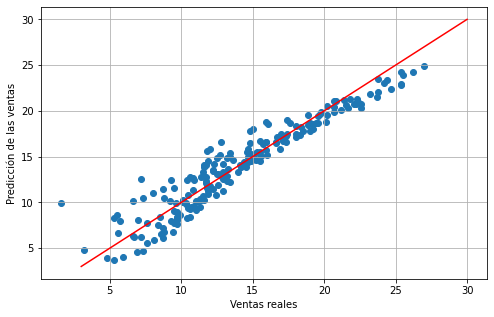

In [21]:
fig = plt.figure(figsize=(8,5))
plt.scatter(Y, modelo_regresion.predict())
plt.plot([3,30],[3,30], color='red')
plt.xlabel(r'Ventas reales')
plt.ylabel(r'Predicción de las ventas')
plt.grid()
plt.show()

In [24]:
# Calcular MSE
mse = np.mean((Y - modelo_regresion.predict())**2)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular coeficiente de variación
cv = rmse/np.mean(Y)

# Imprimir resultados
print("El MSE = {:.2f}".format(mse))
print("El RMSE = {:.2f}".format(rmse))
print("El CV = {:.2f}".format(cv))

El MSE = 2.71
El RMSE = 1.65
El CV = 0.12
